In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [54]:
df_issues_per_contributor = pd.read_csv('data_processed/issues_per_contributor.csv')
df_issues_per_contributor.head()

,contributor,issues_count
0,numpy-gitbot,1595
1,thouis,611
2,charris,382
3,eric-wieser,307
4,seberg,201


### Top 15 contributors with the most issues

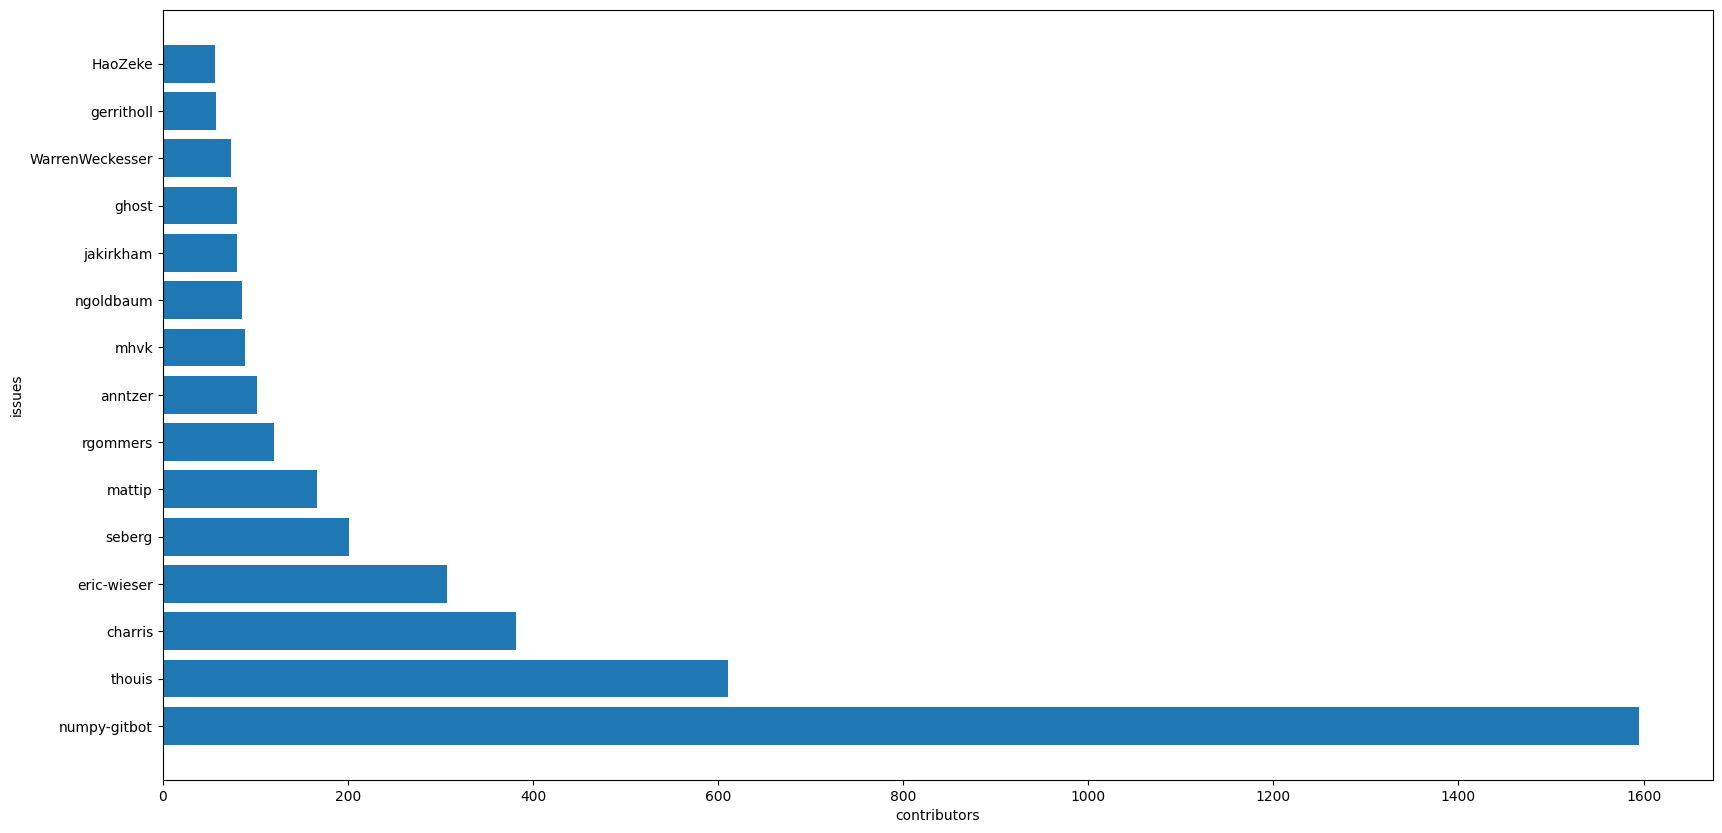

In [55]:
df_top_contributors = df_issues_per_contributor.sort_values(by='issues_count',ascending=False).head(15)

X = df_top_contributors['contributor']
Y = df_top_contributors['issues_count']
plt.figure(figsize=(20,10))
plt.barh(X,Y)
plt.xlabel("contributors")
plt.ylabel("issues")
plt.show()

### Những label có số lần được gán nhãn cho issues nhiều nhất

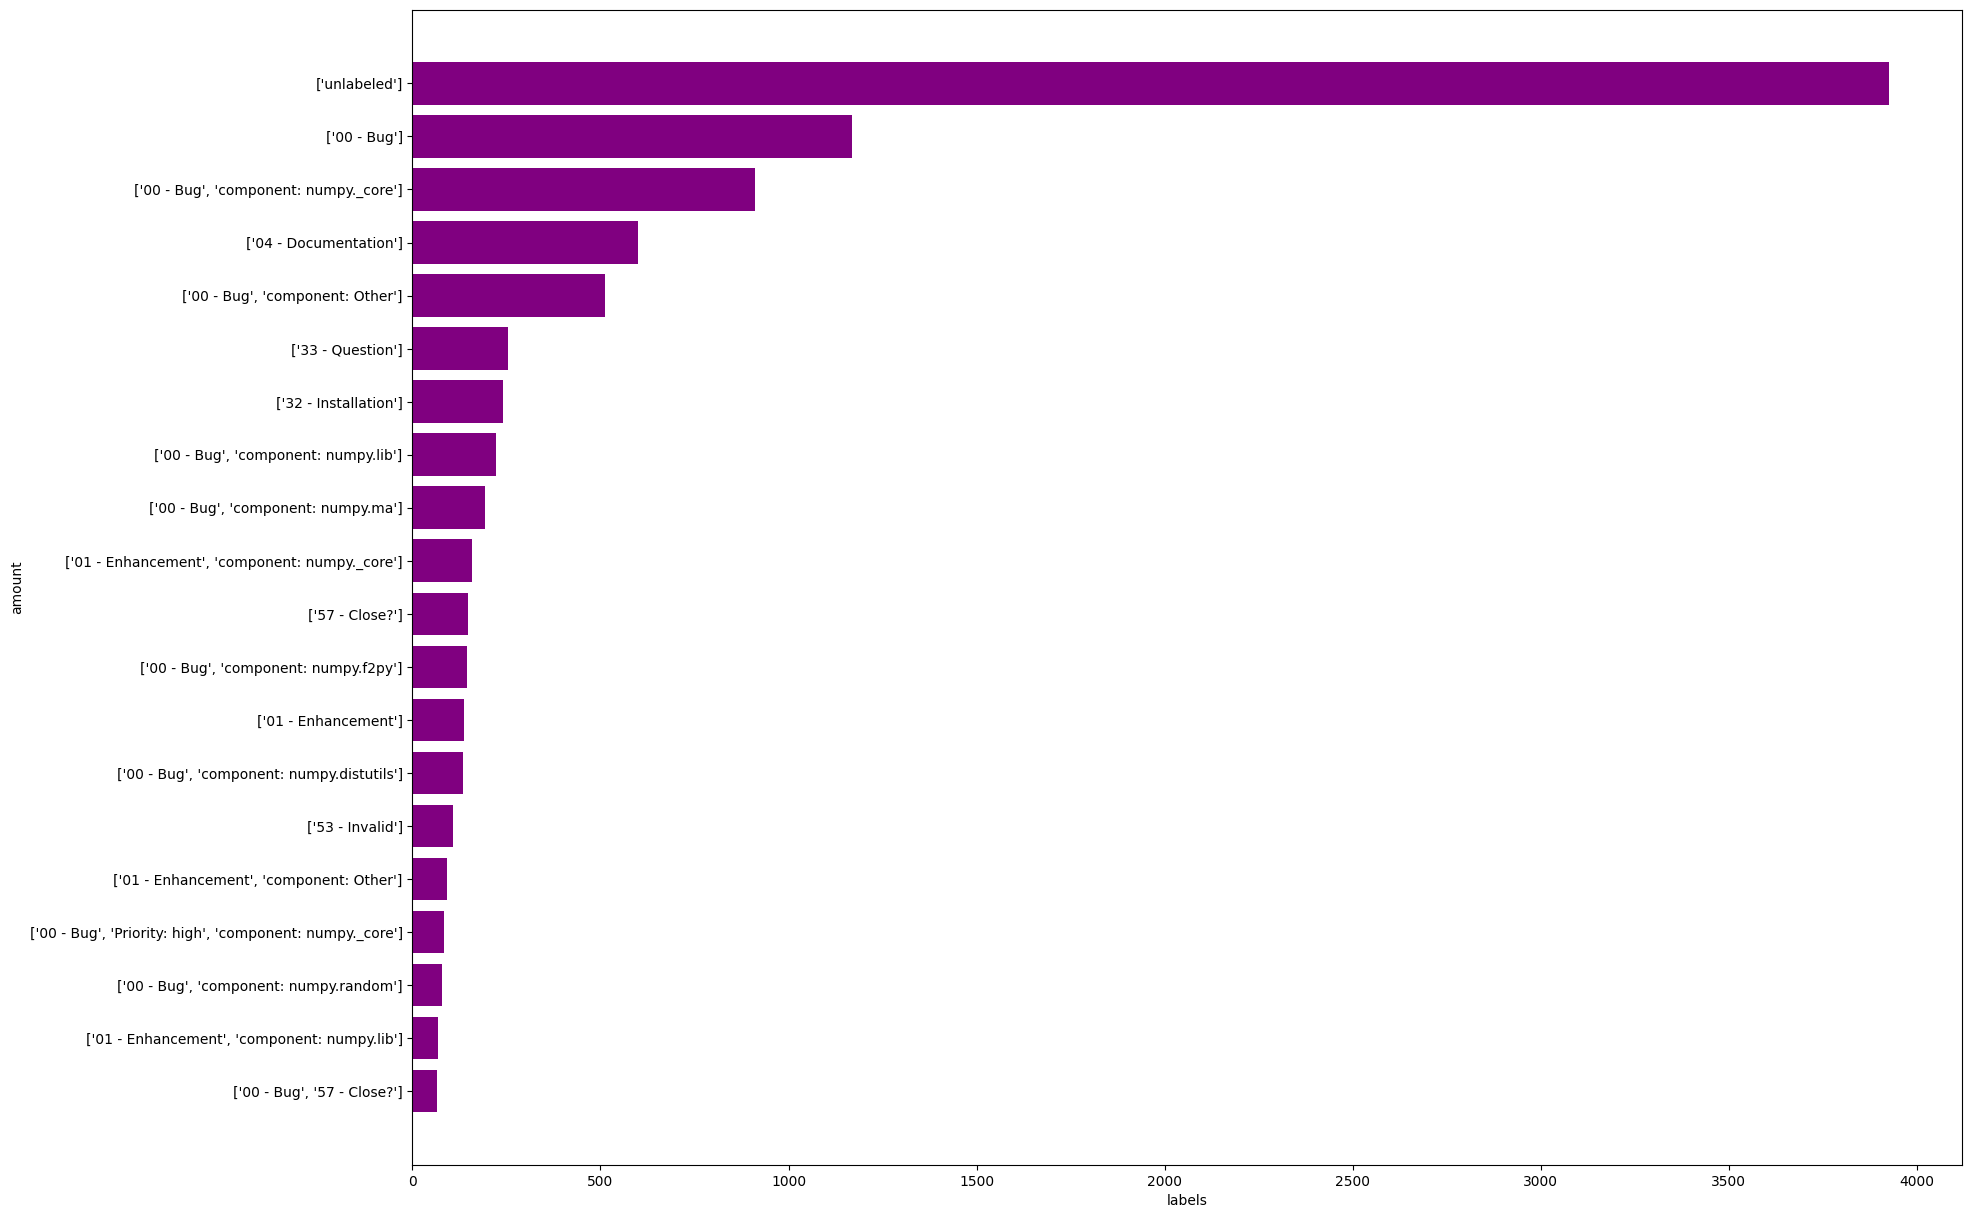

In [56]:
df_labels = pd.read_csv('data_processed/label_counts.csv')
dfl = df_labels.head(20)
dfls = dfl.sort_values(by='count', ascending=True)
X = dfls['label']
Y = dfls['count']
plt.figure(figsize=(20,15))
plt.barh(X,Y,color='#800080')
plt.xlabel("labels")
plt.ylabel("amount")
plt.show()

In [57]:
df_issues = pd.read_csv('data_processed/issues_cleaned.csv')

### Sum of issues

##### 1.Sum of closed issues

In [58]:
len(df_issues[df_issues['state']=='closed'])

10906

##### 2.Sum of open issues

In [59]:
len(df_issues[df_issues['state']=='open'])

1973

### A number of issues over the years

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21528\3447011732.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=issues_by_year.index, y=issues_by_year.values, palette="Blues_d")


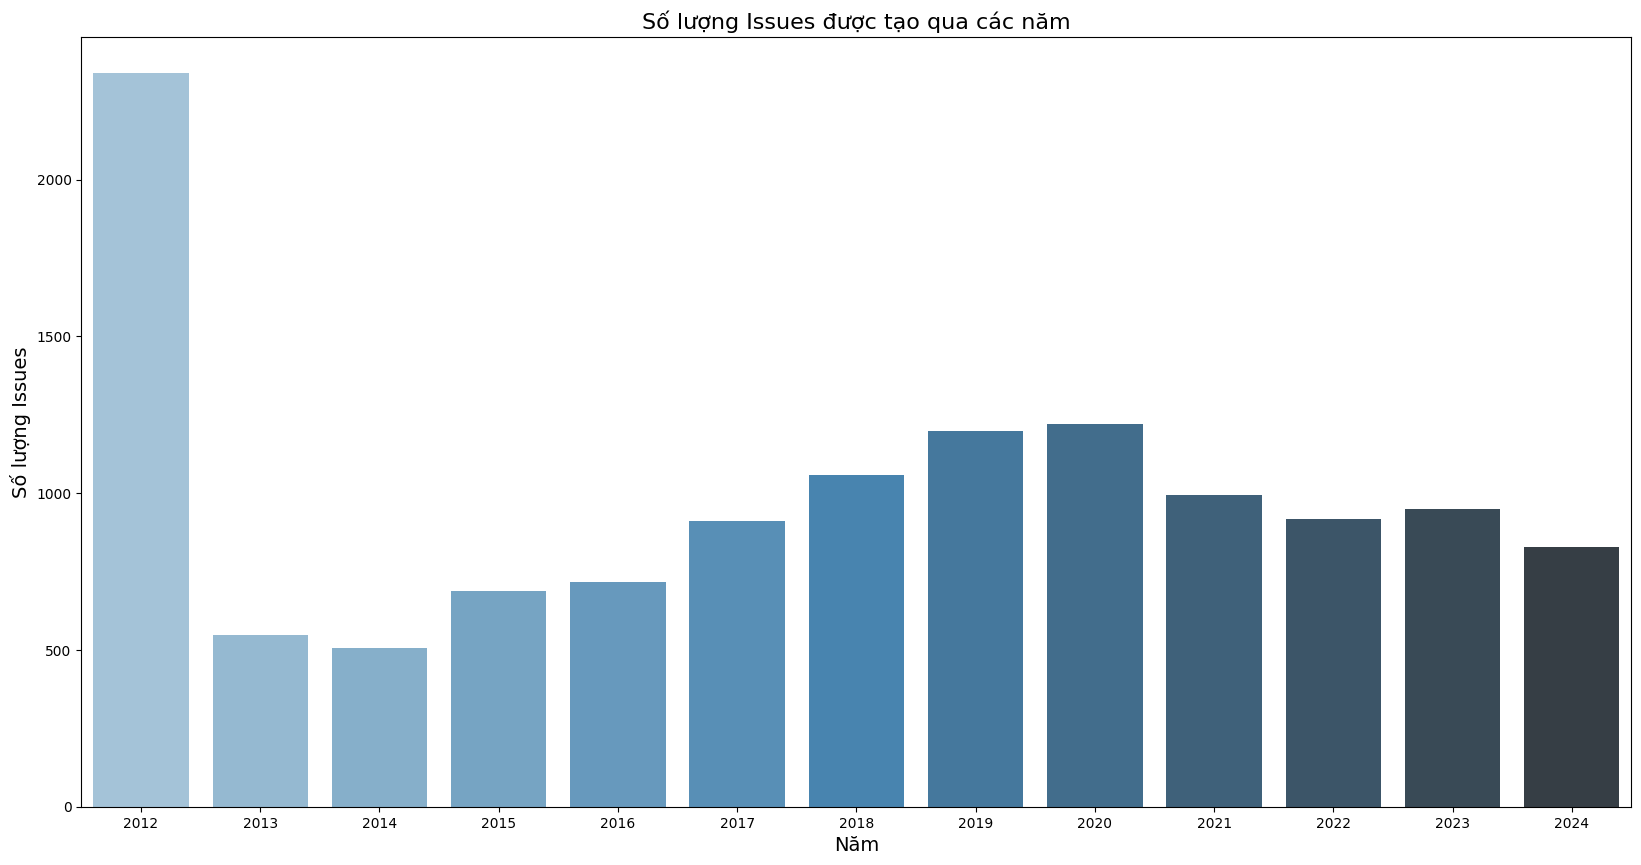

In [60]:
df_issues['created_at'] = pd.to_datetime(df_issues['created_at'])
df_issues['closed_at'] = pd.to_datetime(df_issues['closed_at'])
year_issues = df_issues['created_at'].dt.year

issues_by_year = year_issues.value_counts().sort_index()

plt.figure(figsize=(20, 10))

# Vẽ biểu đồ cột
sns.barplot(x=issues_by_year.index, y=issues_by_year.values, palette="Blues_d")

# Thêm tiêu đề và nhãn
plt.title('Số lượng Issues được tạo qua các năm', fontsize=16)
plt.xlabel('Năm', fontsize=14)
plt.ylabel('Số lượng Issues', fontsize=14)

# Hiển thị biểu đồ
plt.show()

### A number of open issues over the months from 2012 to 2024

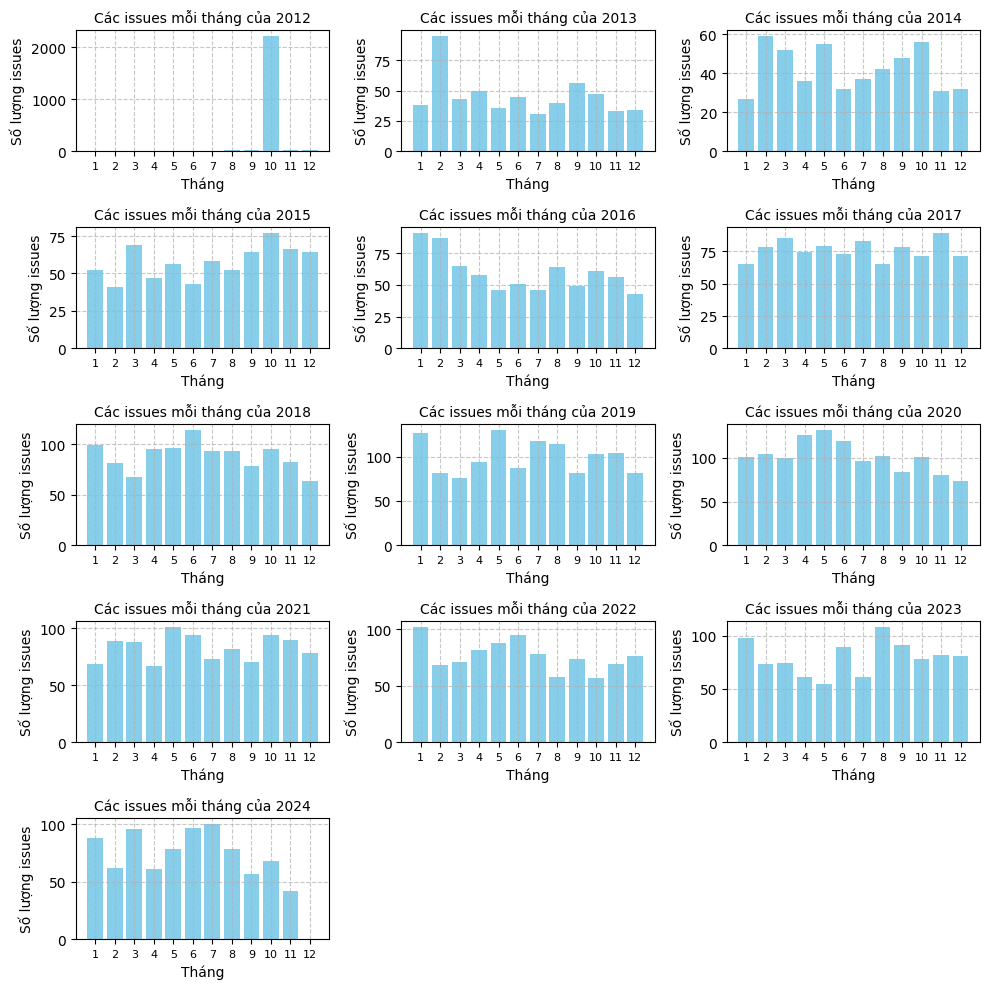

In [61]:
import math
df_issues['year'] = df_issues['created_at'].dt.year
df_issues['month'] = df_issues['created_at'].dt.month

months_count_issues = df_issues.groupby(['year','month']).size().unstack(fill_value=0)

years = months_count_issues.index

n_cols = 3
n_rows = math.ceil(len(years) / n_cols)  


fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 2 * n_rows))


axes = axes.flatten()

# Vẽ từng biểu đồ
for i, year in enumerate(years):
    axes[i].bar(months_count_issues.columns, months_count_issues.loc[year], color='skyblue')
    axes[i].set_title(f'Các issues mỗi tháng của {year}', fontsize=10)
    axes[i].set_xlabel('Tháng', fontsize=10)
    axes[i].set_ylabel('Số lượng issues', fontsize=10)
    axes[i].set_xticks(range(1, 13))  # Các tháng từ 1 đến 12
    axes[i].set_xticklabels(['1', '2', '3', '4', '5', '6', 
                             '7', '8', '9', '10', '11', '12'], fontsize=8)
    axes[i].grid(True, linestyle='--', alpha=0.7)


for j in range(len(years), len(axes)):
    axes[j].axis('off')


plt.tight_layout()


plt.show()

### A number of closed issues over the months from 2012 to 2024

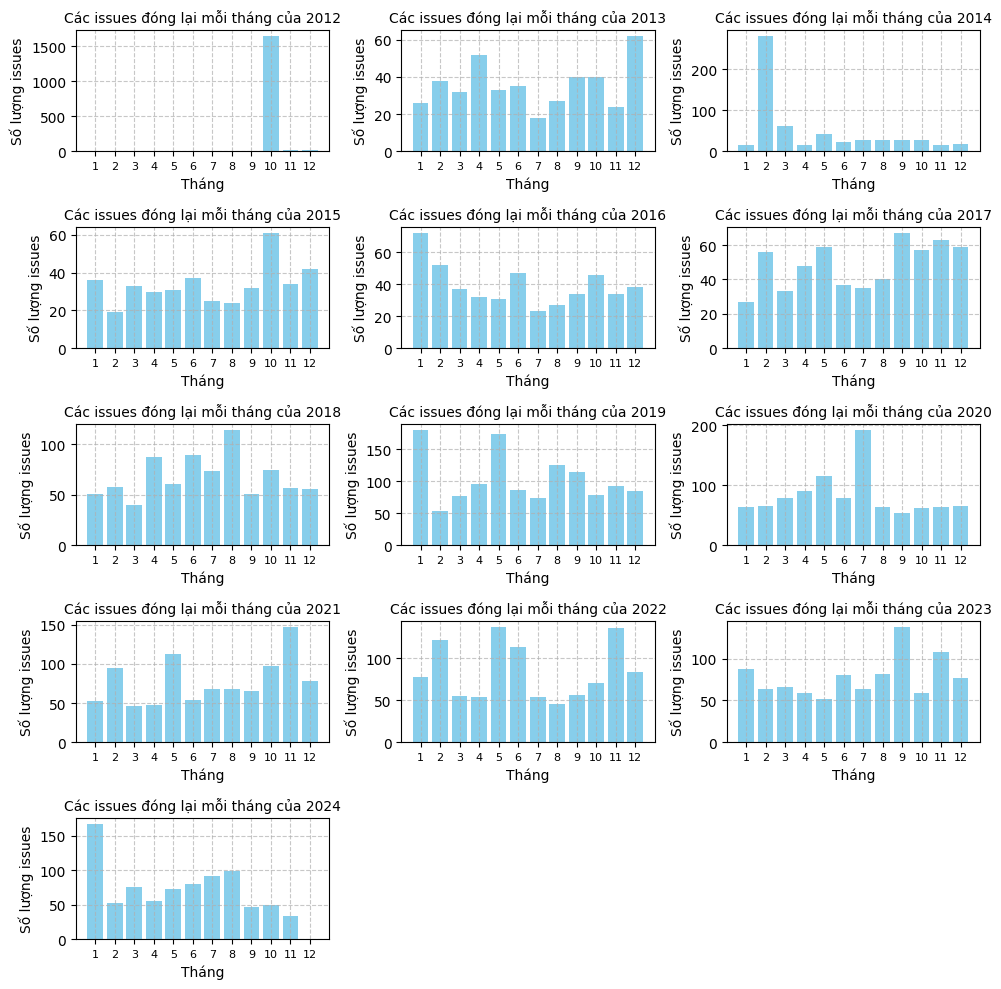

In [62]:
df_issues['year'] = df_issues['closed_at'].dt.year
df_issues['month'] = df_issues['closed_at'].dt.month

months_count_issues = df_issues.groupby(['year','month']).size().unstack(fill_value=0)

years = months_count_issues.index

n_cols = 3
n_rows = math.ceil(len(years) / n_cols)  

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 2 * n_rows))

axes = axes.flatten()

# Vẽ từng biểu đồ
for i, year in enumerate(years):
    axes[i].bar(months_count_issues.columns, months_count_issues.loc[year], color='skyblue')
    axes[i].set_title(f'Các issues đóng lại mỗi tháng của {int(year)}', fontsize=10)
    axes[i].set_xlabel('Tháng', fontsize=10)
    axes[i].set_ylabel('Số lượng issues', fontsize=10)
    axes[i].set_xticks(range(1, 13))  # Các tháng từ 1 đến 12
    axes[i].set_xticklabels(['1', '2', '3', '4', '5', '6', 
                             '7', '8', '9', '10', '11', '12'], fontsize=8)
    axes[i].grid(True, linestyle='--', alpha=0.7)

for j in range(len(years), len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.show()

### Top issues have the most comments

In [63]:
pd.set_option('display.max_colwidth', 200)
sort_comment_issues = df_issues.sort_values(by='comment',ascending=False)
sort_comment_issues[['number','labels','comment']].head(20)

,number,labels,comment
9264,5844,"['component: numpy._core', '54 - Needs decision']",328
9448,5479,['component: distribution'],267
4215,16744,"['00 - Bug', '32 - Installation']",182
5627,13635,"['15 - Discussion', 'component: numpy.random']",166
10056,4007,['component: numpy.linalg'],155
579,26191,['Tracking / planning'],136
7226,10161,['57 - Close?'],118
4398,16313,['component: numpy.random'],106
8613,7372,"['15 - Discussion', 'component: build']",98
3796,17807,['component: build'],97


### Top issues that take more than 7 days to solve

In [64]:
df_issues['closed_at'] = pd.to_datetime(df_issues['closed_at'])
df_issues['created_at'] = pd.to_datetime(df_issues['created_at'])

closed_issues = df_issues[df_issues['state'] == 'closed'].copy()
closed_issues.loc[:, 'solution_time'] = (closed_issues['closed_at'] - closed_issues['created_at']).dt.days

issues_over_1_week = closed_issues[closed_issues['solution_time'] > 7]
issues_over_1_week[['labels','solution_time']]


,labels,solution_time
35,"['00 - Bug', 'component: numpy.f2py']",12
58,['Static typing'],8
64,['unlabeled'],16
66,"['00 - Bug', 'component: numpy.f2py']",12
106,['unlabeled'],27
...,...,...
12874,['unlabeled'],51
12875,['unlabeled'],728
12876,['unlabeled'],650
12877,['unlabeled'],622


### Describe the time period in which unlabeled issues were resolved

In [65]:
unlabeled_issues = df_issues[(df_issues['labels'].apply(lambda x: 'unlabeled' in x))].copy()
unlabeled_issues = unlabeled_issues[unlabeled_issues['state'] == 'closed']
unlabeled_issues['solution_time'] = (unlabeled_issues['closed_at'] - unlabeled_issues['created_at']).dt.days
unlabeled_issues_sorted = unlabeled_issues.sort_values(by='solution_time', ascending=True)
creator_uni = unlabeled_issues_sorted['contributor'].unique()
len(creator_uni)

2301

In [66]:
df_issues['contributor'].value_counts().describe()

count    5678.000000
mean        2.268228
std        24.178730
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max      1595.000000
Name: count, dtype: float64

mean = 2,26

In [67]:
fil_issues = df_issues[df_issues['contributor'].isin(creator_uni)]

issue_counts_by_contributor = fil_issues['contributor'].value_counts()

contributors_with_less_than_10_issues = issue_counts_by_contributor[issue_counts_by_contributor < 3]
print("Số người có tổng issues nhỏ hơn 3: ",contributors_with_less_than_10_issues.shape[0])

Số người có tổng issues nhỏ hơn 3:  1958


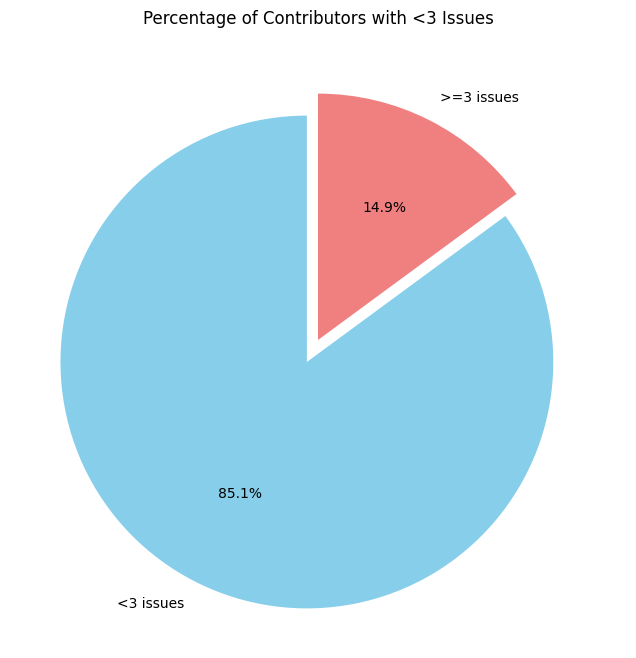

In [68]:
#Số lượng issues của những người đóng góp dưới 3 issues
less_experience = contributors_with_less_than_10_issues.shape[0]

contributors_length = len(creator_uni)

other = contributors_length - less_experience

data = [less_experience,other]
labels = ['<3 issues','>=3 issues']
colors = ['skyblue', 'lightcoral']

plt.figure(figsize=(8, 8))
plt.pie(
    data, 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=colors, 
    explode=(0.1, 0)  
)
plt.title('Percentage of Contributors with <3 Issues')
plt.show()

In [ ]:
other_contributors = unlabeled_issues['contributor'].value_counts()
contributors_with_more_than_3 = other_contributors[other_contributors > 3].index
issues_count = unlabeled_issues[unlabeled_issues['contributor'].isin(contributors_with_more_than_3)].copy()
issues_count['solution'] = (issues_count['closed_at'] - issues_count['created_at']).dt.days
i = issues_count[issues_count['solution'] > 3]
print(len(issues_count))
print(len(i)/len(issues_count))
print(other_contributors)

1032
0.5436046511627907
contributor
charris              152
seberg                59
mattip                57
ghost                 44
anntzer               32
                    ... 
cottrell               1
GF-Huang               1
lieheng-1              1
marisolcontreras1      1
kobejohn               1
Name: count, Length: 2301, dtype: int64


In [70]:
words = [x.split()[0] for x in issues_count['title']]
words_with_no_duplication = pd.DataFrame(list({x:words.count(x)for x in words}.items()), columns = ['Words', 'Time'] )
words_with_no_duplication.sort_values(by = 'Time', ascending = False, inplace = True, ignore_index = True)
words_with_no_duplication.head(30)

,Words,Time
0,BUG:,90
1,2to3,40
2,DOC:,27
3,ENH:,22
4,CI:,15
5,Test,12
6,Add,11
7,1.7.0b1,10
8,Numpy,8
9,BUG,7


### Biểu đồ heatmap cho những người có lượt comments cao  nhất qua 6 tháng của các năm từ 2020 đến 2024

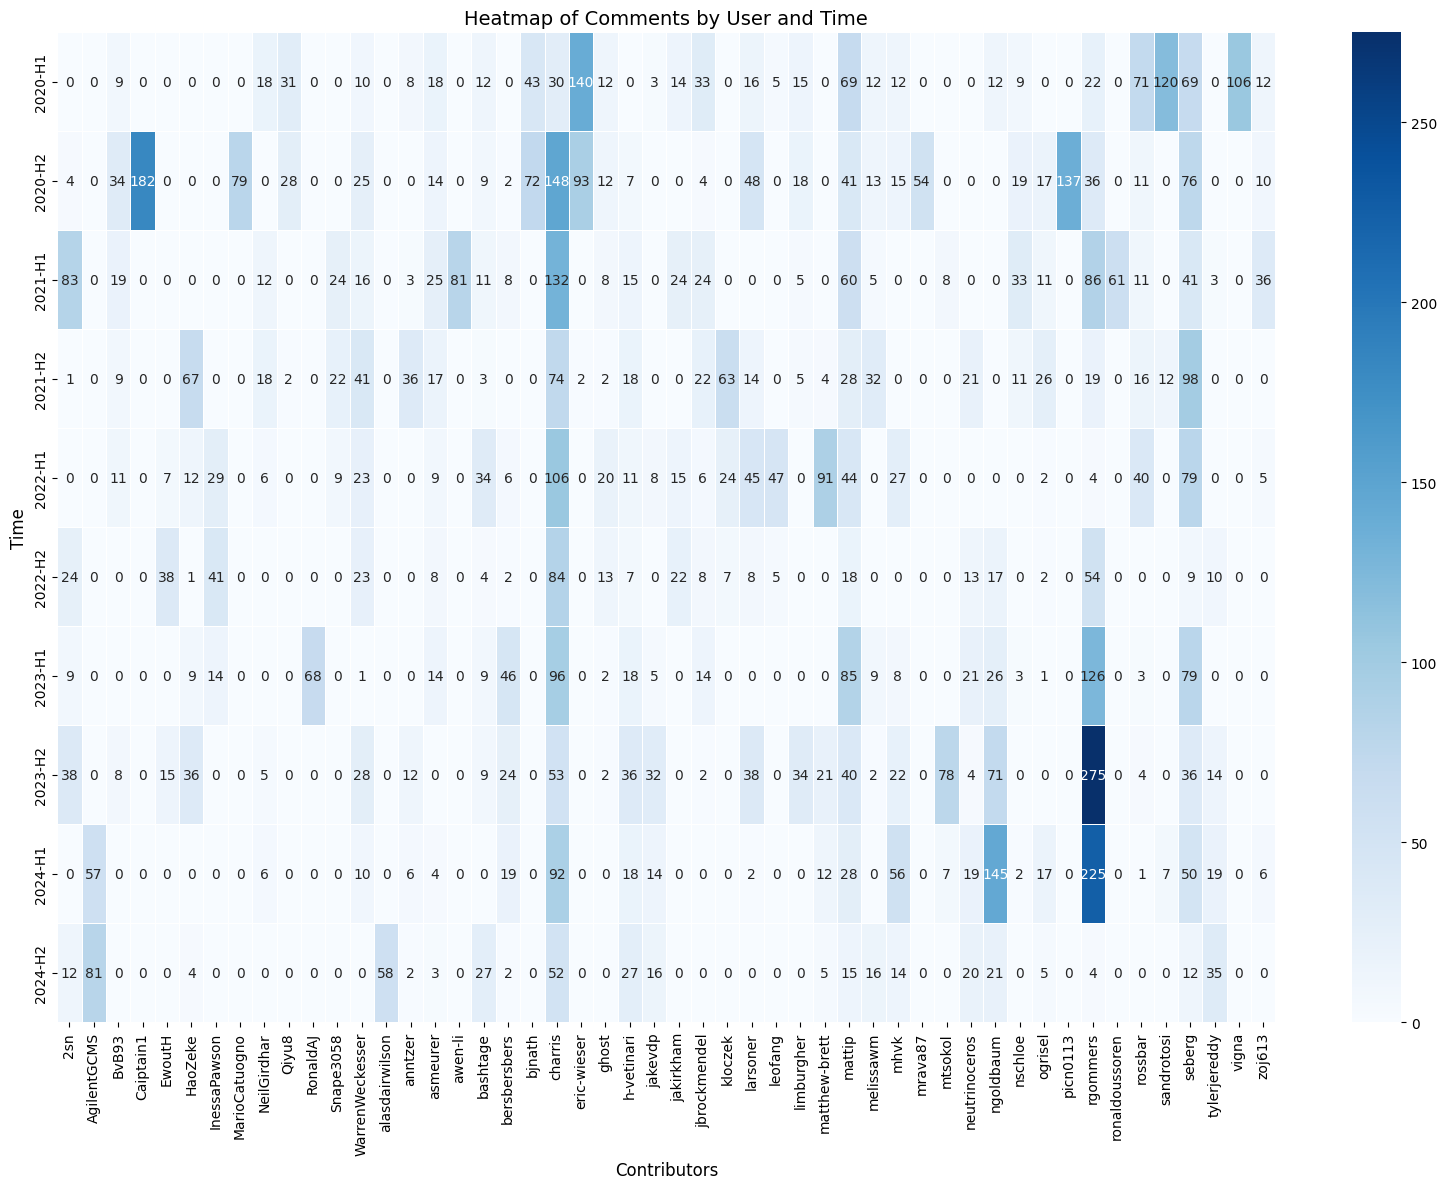

In [72]:
df = df_issues.copy()
df = df[df['created_at'] >= '2020-01-01']
df['six_month_period'] = (
    df['created_at'].dt.year.astype(str) + 
    '-H' + 
    ((df['created_at'].dt.month - 1) // 6 + 1).astype(str)
)
top_user = df.groupby('contributor')['comment'].sum().sort_values(ascending=False).head(50).index
contributor_df = df[df['contributor'].isin(top_user)]
heatmap_data = contributor_df.groupby(['six_month_period', 'contributor'])['comment'].sum().unstack(fill_value=0)

# Vẽ heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.title("Heatmap of Comments by User and Time", fontsize=14)
plt.xlabel("Contributors", fontsize=12)
plt.ylabel("Time", fontsize=12)
plt.tight_layout()
plt.show()

### Từ xuất hiện nhiều nhất trong các Title

In [73]:
words = [x.split()[0] for x in df_issues['title']]
words_with_no_duplication = pd.DataFrame(list({x:words.count(x)for x in words}.items()), columns = ['Words', 'Time'] )
words_with_no_duplication.sort_values(by = 'Time', ascending = False, inplace = True, ignore_index = True)
words_with_no_duplication.head(10)

,Words,Time
0,BUG:,1952
1,DOC:,618
2,ENH:,560
3,numpy,168
4,Numpy,158
5,Add,95
6,f2py,91
7,Inconsistent,83
8,Error,75
9,Memory,60


In [74]:
bug_issues = df_issues[
    df_issues['labels'].apply(lambda x: '00 - Bug' in x) & 
    (df_issues['state'] == 'closed')].copy()
bug_issues['solution'] = (bug_issues['closed_at'] - bug_issues['created_at']).dt.total_seconds() / 3600
bug_issues[['labels','solution']].head(30)

,labels,solution
2,['00 - Bug'],0.010278
4,"['00 - Bug', 'Static typing']",3.475000
6,['00 - Bug'],0.222778
7,['00 - Bug'],0.388056
16,"['00 - Bug', 'component: numpy.strings']",42.676111
18,"['00 - Bug', '57 - Close?']",24.185000
19,"['00 - Bug', 'component: numpy.random']",17.289167
25,"['00 - Bug', 'component: numpy.f2py']",120.028333
27,"['00 - Bug', '57 - Close?']",0.192222
28,"['00 - Bug', 'component: numpy.strings']",154.428333
